# **IMPORTADO DE MÓDULOS/PULSOS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d

import tensorflow as tf
tf.version.VERSION

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import initializers
from keras.regularizers import l2
from keras.optimizers import Adam

In [2]:
V55= np.load('/home/josea/Co60_5cm_5cm.npy')
V28= np.load('/home/josea/Co60_2cm_8cm.npy')
V82= np.load('/home/josea/Co60_8cm_2cm.npy')

In [ ]:
start = 0
stop = 600
EXTRASAMPLING = 8

Nt = V28[:,start:stop,:].shape[1]
Nt_new = Nt * 8
t_step = 0.2
new_t_step = t_step / EXTRASAMPLING
tiempo = np.linspace(0, Nt, Nt)
tiempo_new = np.linspace(0, Nt, Nt_new)

interp_func_V28 = interp1d(tiempo,V28[:,start:stop,:], kind = 'cubic', axis=1)
new_V28 = interp_func_V28(tiempo_new)

interp_func_V55 = interp1d(tiempo,V55[:,start:stop,:], kind = 'cubic', axis=1)
new_V55 = interp_func_V55(tiempo_new)

interp_func_V82 = interp1d(tiempo,V82[:,start:stop,:], kind = 'cubic', axis=1)
new_V82 = interp_func_V82(tiempo_new)

# **MEAN PULSE CALC. USING FOURIER TRANSFORM**

In [22]:
signals_dec0 = V55[:,:,0]
signals_dec1 = V55[:,:,1]

In [23]:
transforms = []
magnitude = []
phase = []

for i in range(signals_dec0.shape[0]):
  fourier_transform = np.fft.fft(V55[i,:,0])
  transforms.append(fourier_transform)
  magnitude.append(np.abs(fourier_transform))
  phase.append(np.angle(fourier_transform))

transforms = np.array(transforms, dtype='object')
magnitude = np.array(magnitude, dtype='object')
phase = np.array(phase, dtype='object')

Text(0, 0.5, 'Magnitude (Arb. units)')

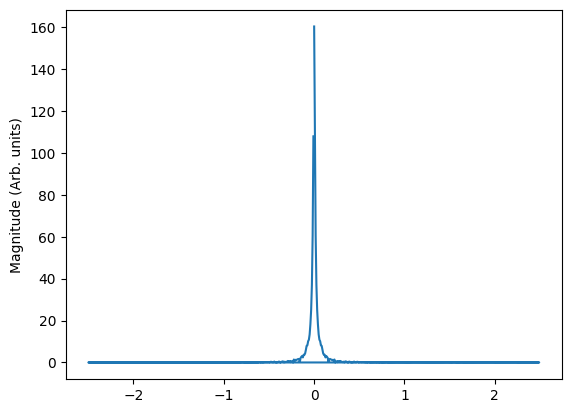

In [24]:
time_step = 0.2 #ns
freqs = np.fft.fftfreq(V55.shape[1], time_step)  # Compute frequency axis
plt.plot(freqs,magnitude[0,:])
plt.ylabel('Magnitude (Arb. units)')

Text(0.5, 1.0, 'Pulses minus mean')

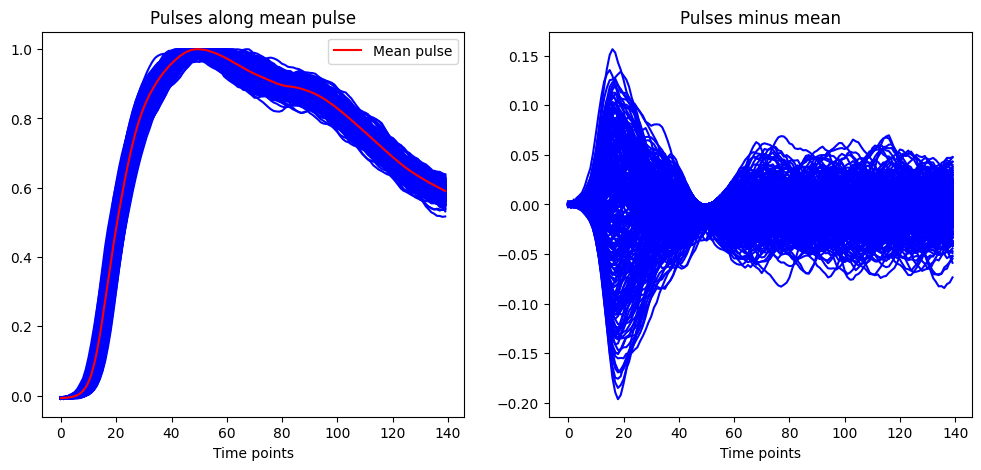

In [25]:
sum = np.sum(transforms, axis = 0)
reconstructed_signal = np.fft.ifft(sum)
normalized_recons = reconstructed_signal/np.max(reconstructed_signal)




start = 60
stop = 200
plt.figure(figsize=(12,5))
plt.subplot(121)
for i in range(V55.shape[0]):
  plt.plot(V55[i,:,0][start:stop],'b-')
plt.plot(normalized_recons[start:stop],'r-', label = 'Mean pulse')
plt.xlabel('Time points')
plt.legend()
plt.title('Pulses along mean pulse')

plt.subplot(122)
for i in range(V55.shape[0]):
  plt.plot(V55[i,:,0][start:stop]-normalized_recons[start:stop],'b-')
plt.xlabel('Time points')
plt.title('Pulses minus mean')


# **CORRELATION**

In [ ]:
from scipy import signal

delay_arr = np.arange(Nt_new)
n = Nt_new
TOF_dec0_V28 = []
y1 = new_V28[0,:,0]

for i in range(new_V28.shape[0]):
  y2 = new_V28[i,:,0]
  corr = signal.correlate(y2, y1, mode='same')
  delay = delay_arr[np.argmax(corr)] - n//2
  TOF_dec0_V28.append(delay)

TOF_dec0_V28 = np.array(TOF_dec0_V28)*new_t_step
plt.hist(TOF_dec0_V28, bins = 10,alpha=0.5);
print(np.std(TOF_dec0_V28))


In [ ]:
#def calculate_corr(reference,vector):
